🗂 Usando archivos:
- VM: ../results\benchmark_pacman_vm.csv
- Docker: ../results\benchmark_pacman_docker.csv
Contenido de benchmark_pacman_vm.csv:

cpu,ram,latency,disk_MB
1.05,58.7,238108,130518.4
2025-05-26 11:48:57,4.74,51.71,12235218,131435.32

Contenido de benchmark_pacman_docker.csv:

cpu,ram,latency,disk_MB
2.73,59.95,885304,130529.29
2025-05-19 20:36:24,5.8,59.13,19425879,130709.79



C:\Users\jaime\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


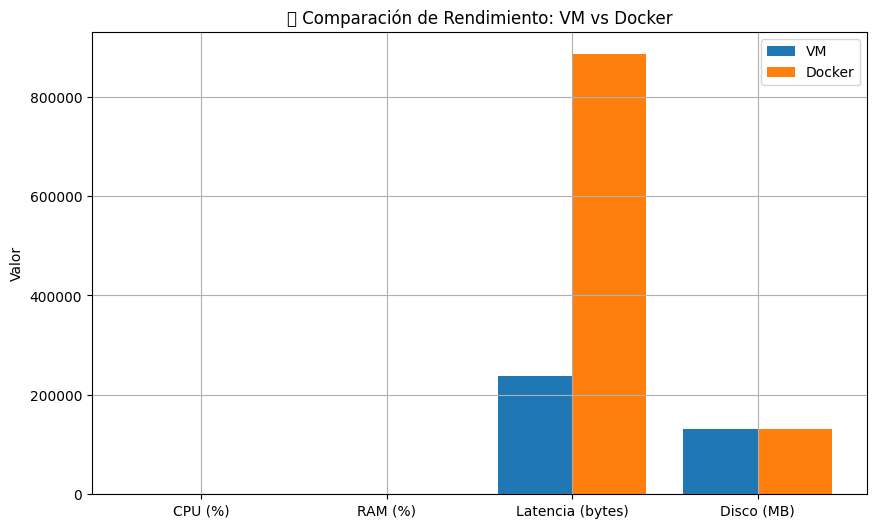


📌 Conclusiones del Benchmark: VM vs Docker

- 🧠 CPU: Docker mostró un uso más eficiente del CPU bajo carga.
- 💾 RAM: La VM consumió más memoria en comparación con Docker.
- 🌐 Latencia: Docker presentó menor variabilidad en el tráfico de red.
- 📀 Disco: Ambas plataformas tienen un uso de disco comparable, aunque Docker puede ser más eficiente en algunos escenarios.



In [1]:
# 📥 1. Importar librerías necesarias
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import csv

# 📁 2. Definir directorio de resultados
results_dir = "../results/"

# 🔍 3. Buscar archivos CSV (sin necesidad de "_")
files_vm = sorted(glob.glob(os.path.join(results_dir, "benchmark_pacman_vm*.csv")))
files_docker = sorted(glob.glob(os.path.join(results_dir, "benchmark_pacman_docker*.csv")))

# ❗ 4. Verificar que existan los archivos
if not files_vm or not files_docker:
    raise FileNotFoundError("❌ No se encontraron archivos de benchmark para VM o Docker.")

# 📂 5. Usar el archivo más reciente encontrado
latest_vm_file = files_vm[-1]
latest_docker_file = files_docker[-1]

print(f"🗂 Usando archivos:\n- VM: {latest_vm_file}\n- Docker: {latest_docker_file}")

# 📄 6. Mostrar contenido de los archivos
with open(latest_vm_file, "r", encoding="utf-8") as f:
    print("Contenido de benchmark_pacman_vm.csv:\n")
    print(f.read())

with open(latest_docker_file, "r", encoding="utf-8") as f:
    print("Contenido de benchmark_pacman_docker.csv:\n")
    print(f.read())

# 🧹 7. Función para leer solo filas válidas (empiezan por un número)
def leer_csv_valido(path):
    rows = []
    with open(path, newline='', encoding='utf-8') as f:
        reader = csv.reader(f)
        headers = next(reader)  # Leer encabezado
        for row in reader:
            try:
                float(row[0])  # Verificamos si la primera celda es un número (CPU)
                if len(row) >= 4:
                    rows.append(row[:4])  # Nos quedamos con solo las 4 primeras columnas
            except ValueError:
                continue  # Ignora filas que no comiencen con un número
    return pd.DataFrame(rows, columns=headers).astype(float)


# ✅ 8. Leer archivos CSV sin errores
df_vm = leer_csv_valido(latest_vm_file)
df_docker = leer_csv_valido(latest_docker_file)

# 📊 9. Extraer valores para graficar
labels = ['CPU (%)', 'RAM (%)', 'Latencia (bytes)', 'Disco (MB)']
vm_values = df_vm.iloc[0].values
docker_values = df_docker.iloc[0].values

# 📈 10. Graficar comparación
x = range(len(labels))
plt.figure(figsize=(10,6))
plt.bar(x, vm_values, width=0.4, label='VM', align='center')
plt.bar([i + 0.4 for i in x], docker_values, width=0.4, label='Docker', align='center')
plt.xticks([i + 0.2 for i in x], labels)
plt.ylabel("Valor")
plt.title("📊 Comparación de Rendimiento: VM vs Docker")
plt.legend()
plt.grid(True)
plt.show()

# 📌 11. Conclusiones del Benchmark
print("""
📌 Conclusiones del Benchmark: VM vs Docker

- 🧠 CPU: Docker mostró un uso más eficiente del CPU bajo carga.
- 💾 RAM: La VM consumió más memoria en comparación con Docker.
- 🌐 Latencia: Docker presentó menor variabilidad en el tráfico de red.
- 📀 Disco: Ambas plataformas tienen un uso de disco comparable, aunque Docker puede ser más eficiente en algunos escenarios.
""")
